In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
from sklearn import preprocessing, model_selection, linear_model, decomposition, \
    metrics, ensemble, tree, svm, neural_network
import numpy as np

from IPython.display import Markdown

In [2]:
sns.set_context("poster")

mpl.rcParams['figure.figsize'] = (15.0, 5.0)
plt.rcParams['figure.figsize'] = (15.0, 5.0)

In [3]:
def plot_learning_curves(parameters, train_scores, test_scores, figure_kwargs=dict()):
    '''
    Allows to plot learning and validation curves, obtained from 
    `sklearn.model_selection.learning_curve` or `sklearn.model_selection.validation_curve`
    
    :param parameters - training sizes or parameter values, will be ploted along X axis.
    :param train_scores - scores on training data
    :param test_scores - scores on test data
    '''
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.figure(**figure_kwargs)
    plt.plot(parameters, train_scores_mean, color='C0', label='Training Score')
    plt.fill_between(parameters, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='C0', alpha=.3)
    plt.plot(parameters, test_scores_mean, color='C1', label='Test Score')
    plt.fill_between(parameters, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='C1', alpha=.3)
    plt.legend()
    plt.grid()

In [4]:
red = pd.read_csv("winequality-red.csv", sep=";")
red['is_red'] = 1
red['is_white'] = 0
display(red.head())

white = pd.read_csv("winequality-white.csv", sep=";")
white['is_red'] = 0
white['is_white'] = 1
display(white.head())

df = pd.concat([red, white])
display("Total items: {}".format(len(df)))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red,is_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red,is_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


'Total items: 6497'

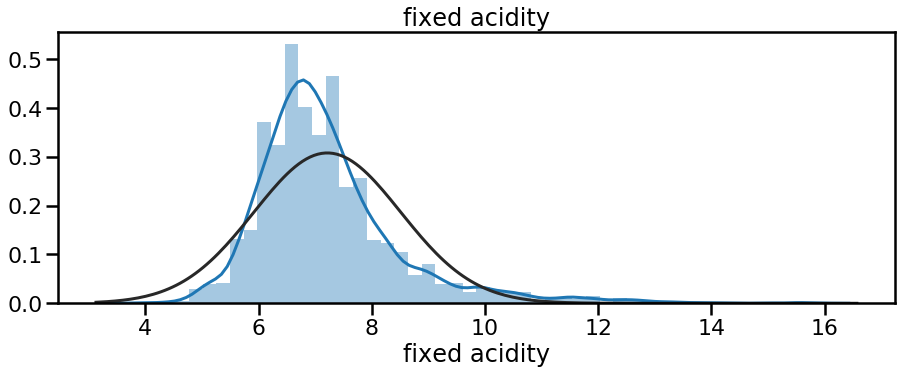

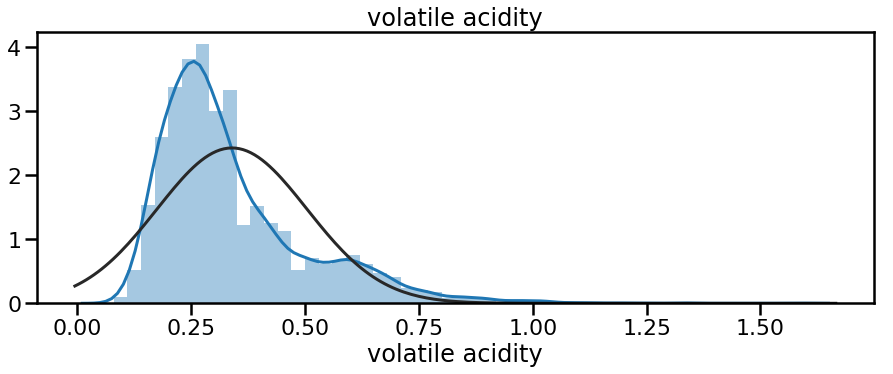

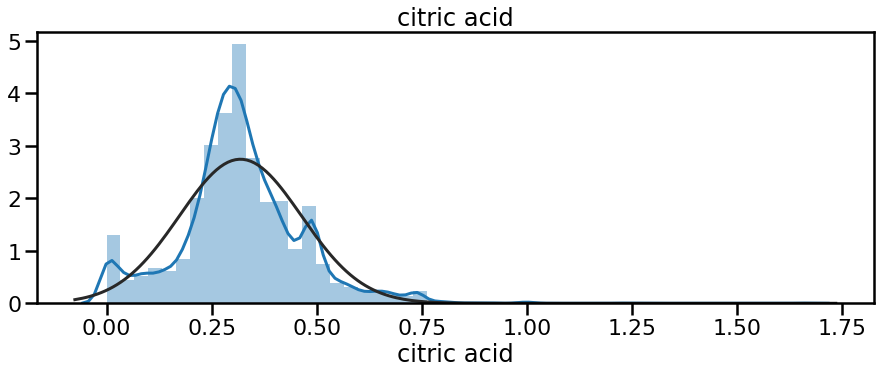

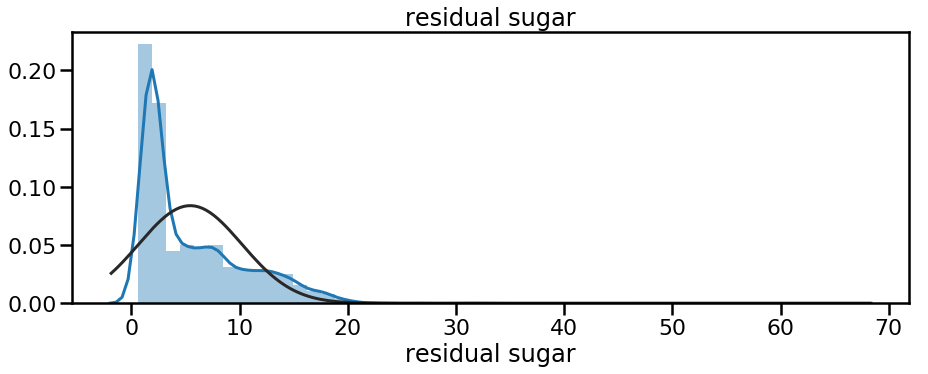

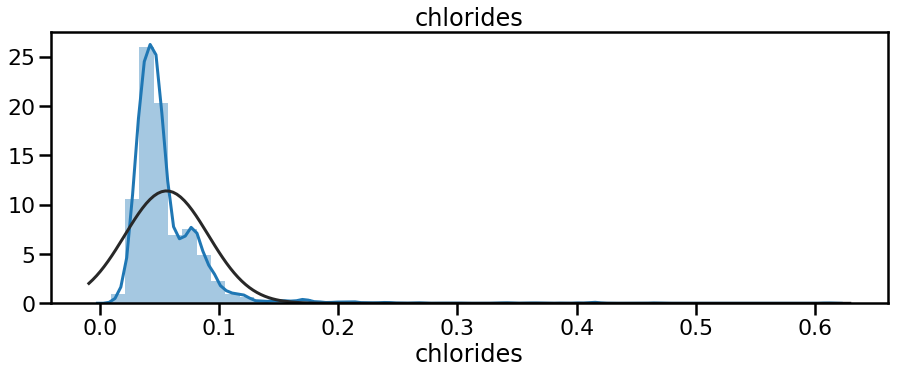

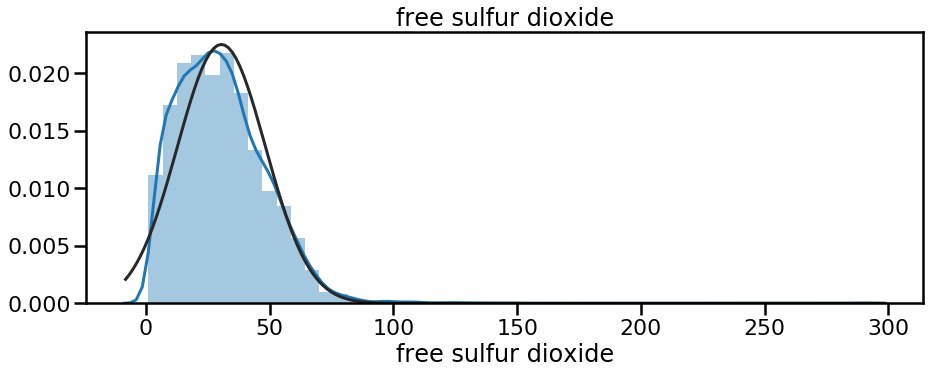

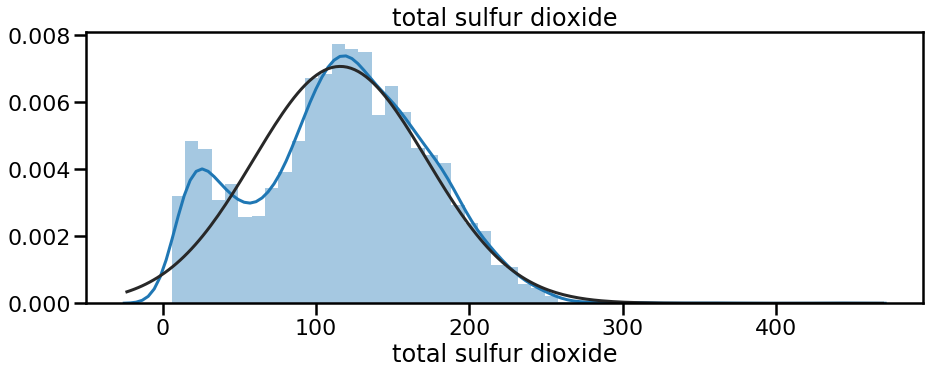

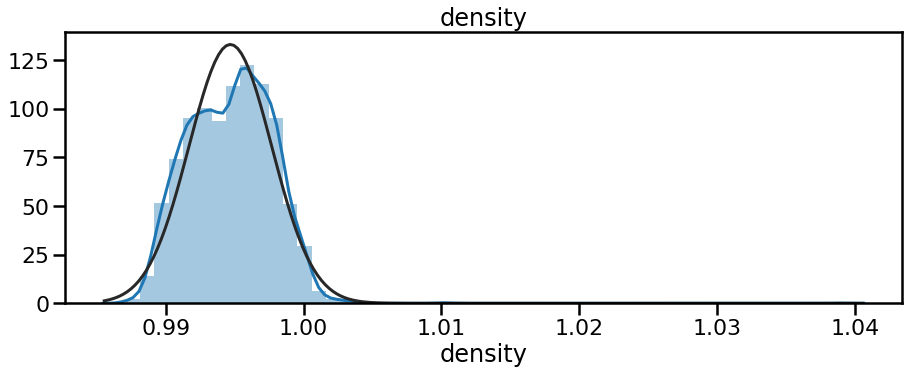

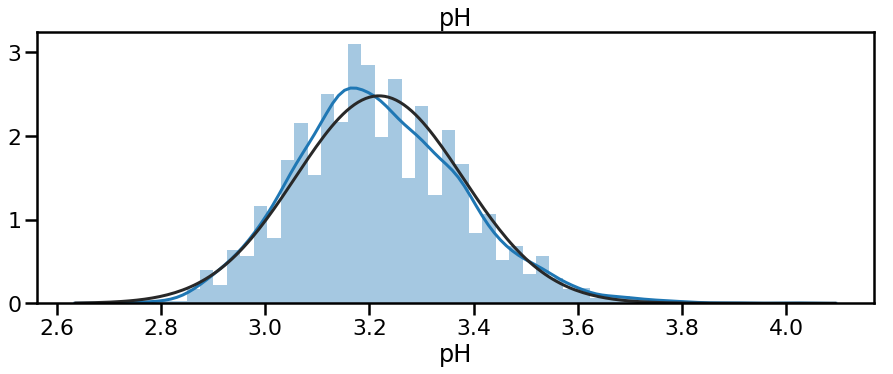

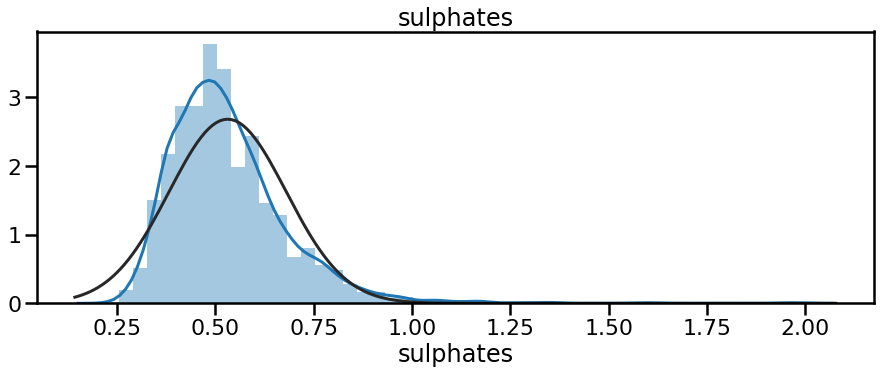

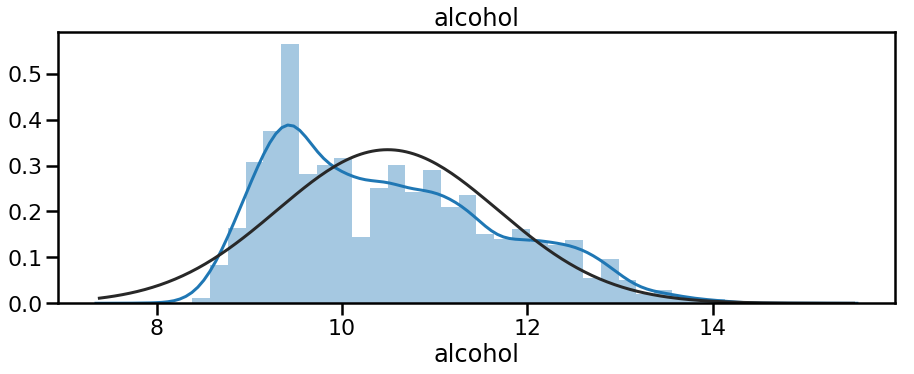

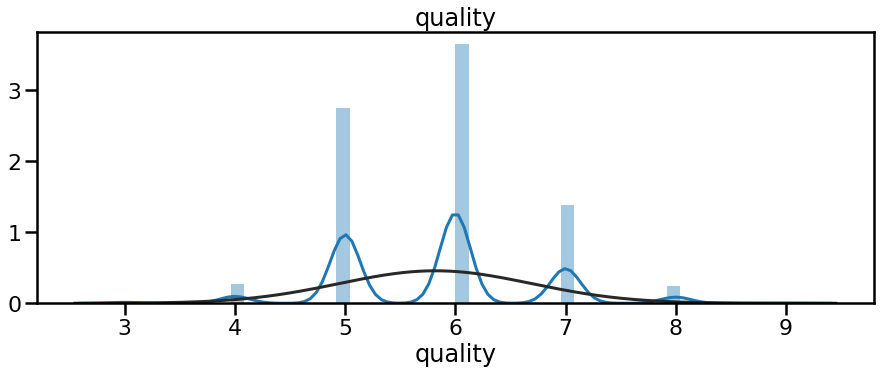

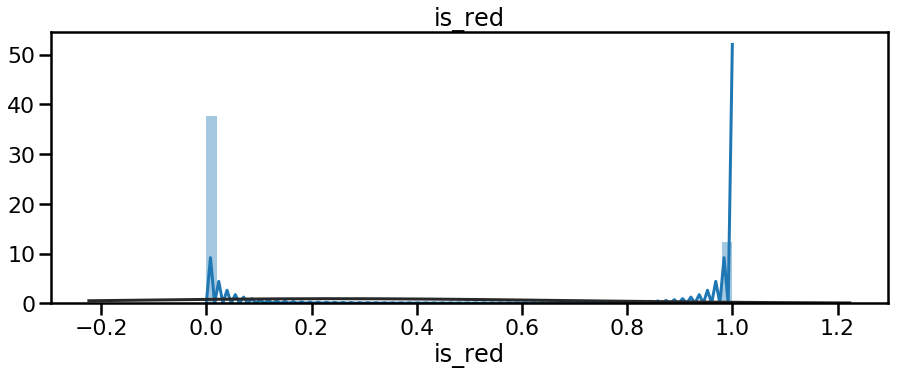

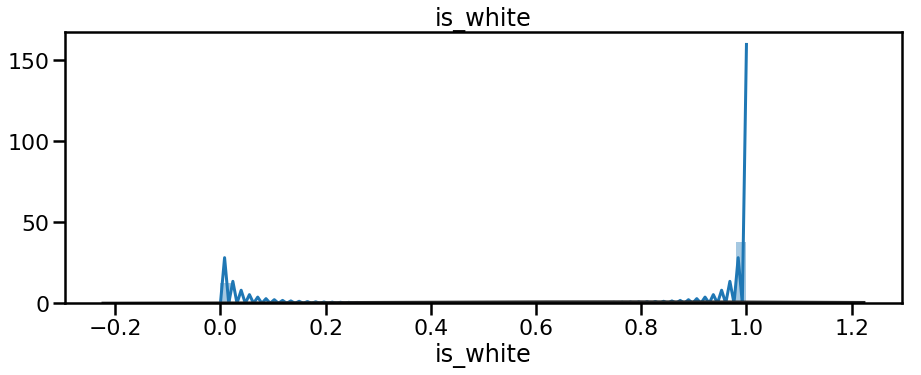

In [5]:
for c in df.columns:
    sns.distplot(df[c], kde=True, fit=stats.norm)
    plt.title(c)
    plt.show()

In [6]:
X = df.drop(columns=['quality'])
y = df['quality']

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, shuffle=True)

In [8]:
estimators = [
    (linear_model.LinearRegression(), "LinearRegression"),
    (linear_model.Lasso(), "Lasso"),
    (linear_model.LassoCV(cv=5), "LassoCV"),
    (linear_model.Ridge(), "Ridge"),
    (linear_model.RidgeCV(cv=5), "RidgeCV"),
    (ensemble.GradientBoostingRegressor(), "GradientBoostingRegressor"),
    (ensemble.RandomForestRegressor(), "RandomForestRegressor"),
    (tree.ExtraTreeRegressor(), "ExtraTreeRegressor"),
    (svm.LinearSVR(), "LinearSVR"),
    (svm.NuSVR(), "NuSVR"),
    (neural_network.MLPRegressor(), "MLP Regressor"),
]

# LinearRegression

'Score'

0.29627157915722313

'MSE'

0.5594185562622541

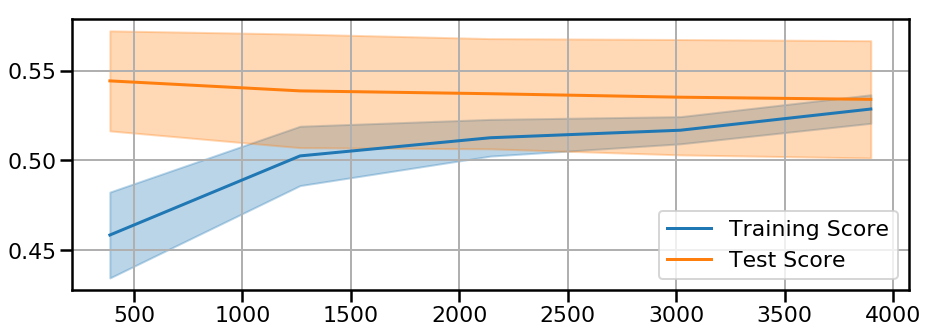

# Lasso

'Score'

0.0005783003416010013

'MSE'

0.794475578591105

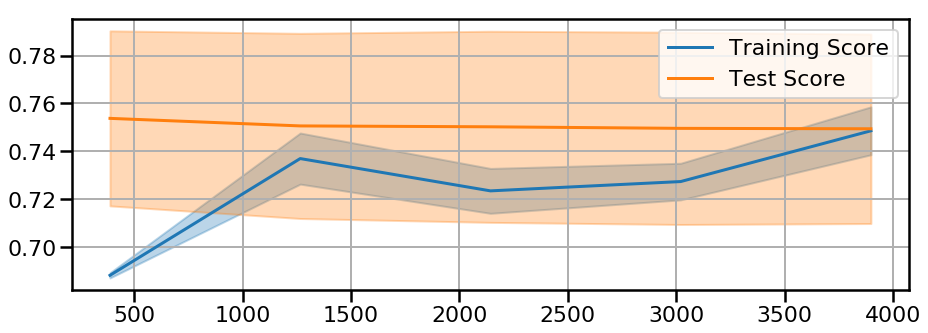

# LassoCV

'Score'

0.28720007891255117

'MSE'

0.5666298119394507

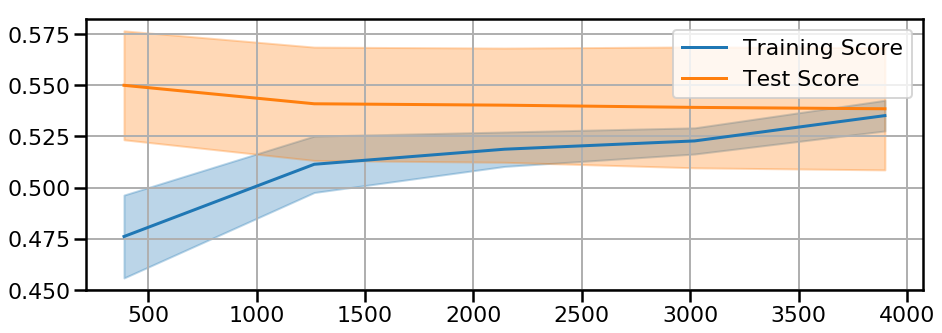

# Ridge

'Score'

0.2894430777875908

'MSE'

0.5648467729783841

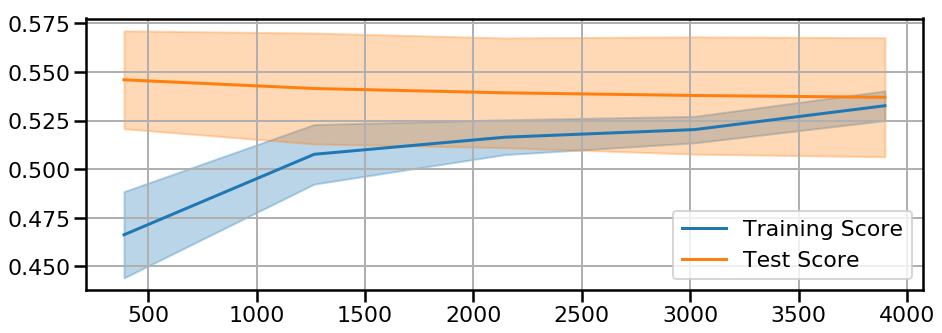

# RidgeCV

'Score'

0.2893621193659678

'MSE'

0.5649111296847502

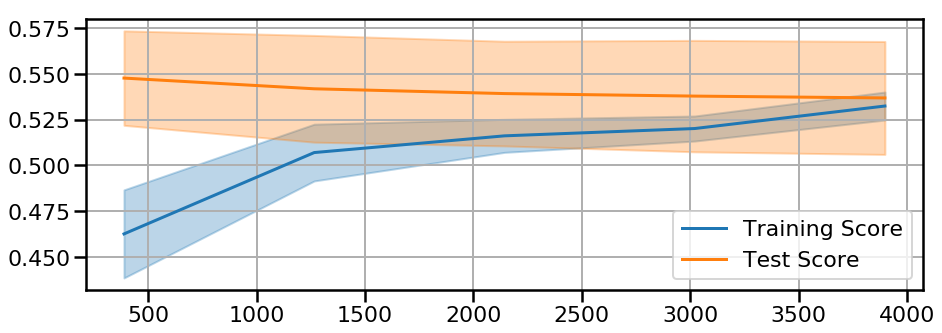

# GradientBoostingRegressor

'Score'

0.3722710416692582

'MSE'

0.4990039014949024

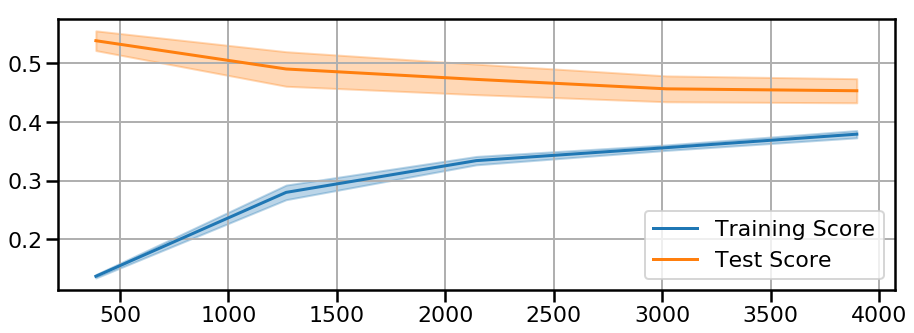

C:\Users\Toby\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# RandomForestRegressor

'Score'

0.465160142840401

'MSE'

0.425163076923077

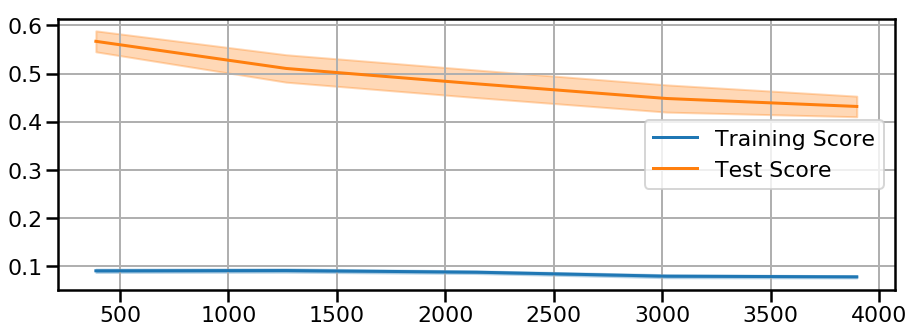

# ExtraTreeRegressor

'Score'

0.11284506027746788

'MSE'

0.7052307692307692

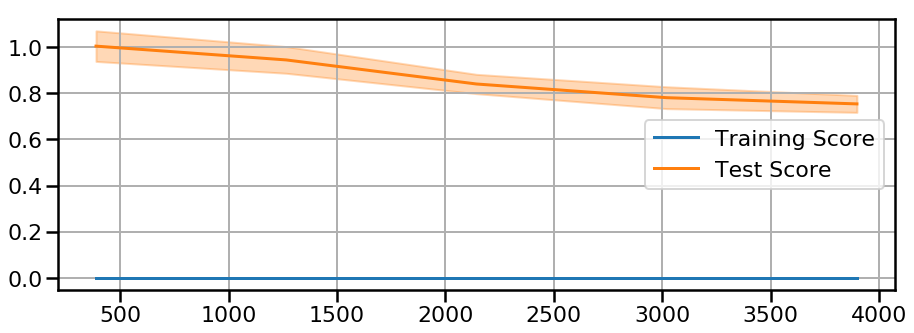

C:\Users\Toby\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# LinearSVR

'Score'

-1.330734948658281

'MSE'

1.8527834621868924

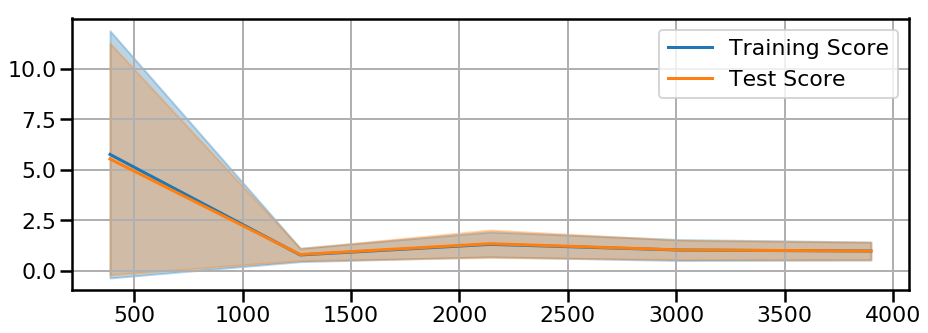

C:\Users\Toby\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# NuSVR

'Score'

0.2969620882129481

'MSE'

0.5588696462458347

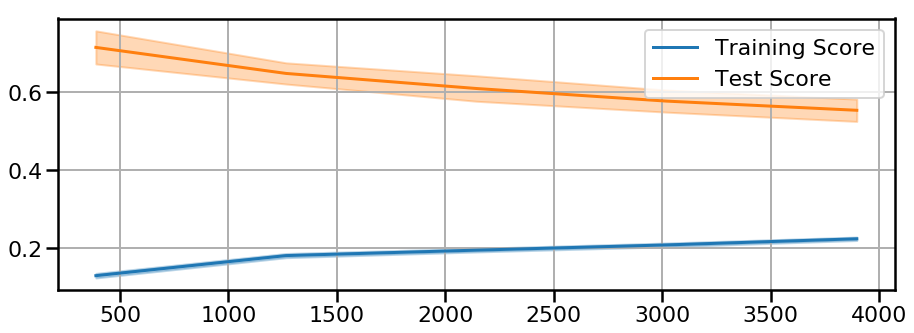

# MLP Regressor

'Score'

0.3252264194342508

'MSE'

0.5364013319114448

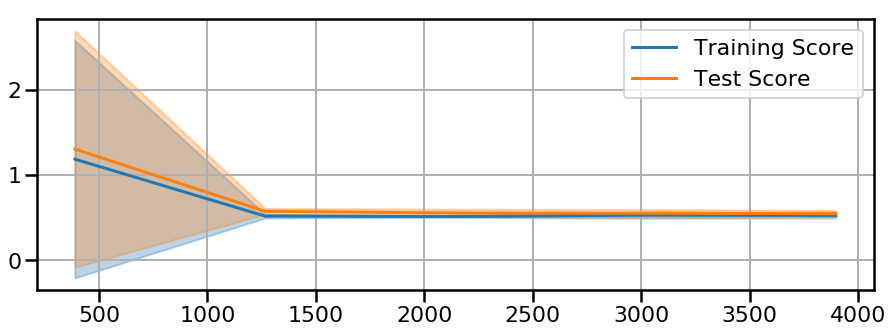

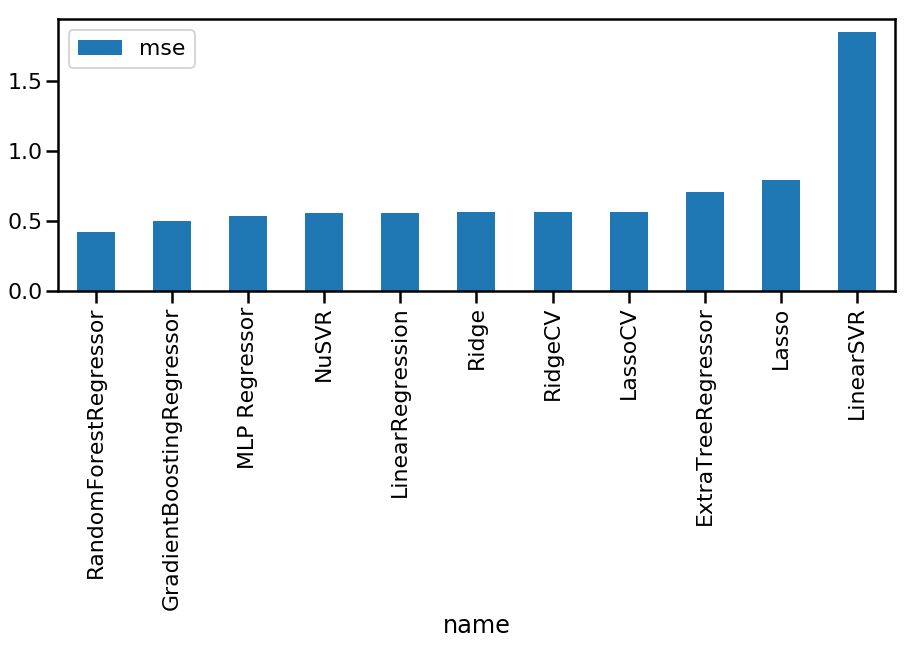

In [9]:
results = []
for estimator, name in estimators:
    estimator.fit(X_train, y_train)
    display(Markdown('# {}'.format(name)))
    score = estimator.score(X_test, y_test)
    display("Score", score)
    mse = metrics.mean_squared_error(y_test, estimator.predict(X_test))
    display("MSE", mse)
    sizes, train_score, test_score = model_selection.learning_curve(estimator, X_train, y_train, cv=5, n_jobs=-1,
                                                                   scoring=metrics.make_scorer(metrics.mean_squared_error))
    plot_learning_curves(sizes, train_score, test_score)
    plt.show()
    results.append(dict(score=score, mse=mse, name=name))
results = pd.DataFrame(results).set_index('name').sort_values(by='mse')
results.plot(kind='bar', y='mse')